In [42]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

# Load data and inspect it

In [141]:
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [143]:
print(digits.target.shape)

(1797,)


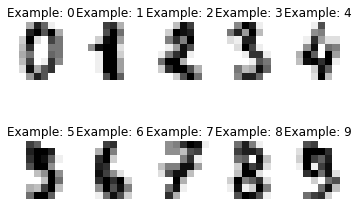

In [44]:
# Visualize examples using matplotlib
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Example: %i' % label)

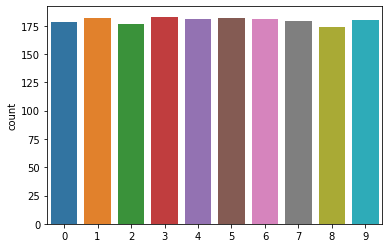

In [45]:
# See digit counts in dataset using seaborn
g = sns.countplot(x=digits.target)

In [46]:
# 70% split between training and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=0)

# Supervised learning - k-NN classifier

In [48]:
# k-NN classifier
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

In [50]:
# Fit data
model = classifier.fit(X_train, y_train)

In [52]:
# Predictions
y_pred = classifier.predict(X_test)

In [54]:
# Get distances and neighbors
dists, neighbors = classifier.kneighbors(X_train)

In [60]:
# Evaluation
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.98      0.98        52
           2       0.98      0.98      0.98        53
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.97      1.00      0.98        60
           7       0.96      1.00      0.98        53
           8       1.00      0.95      0.97        61
           9       0.98      0.98      0.98        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  

# Unsupervised learning - k-means clustering

In [61]:
cluster = KMeans(n_clusters=10)

In [64]:
# Fit
model2 = cluster.fit(X_train, y_train)

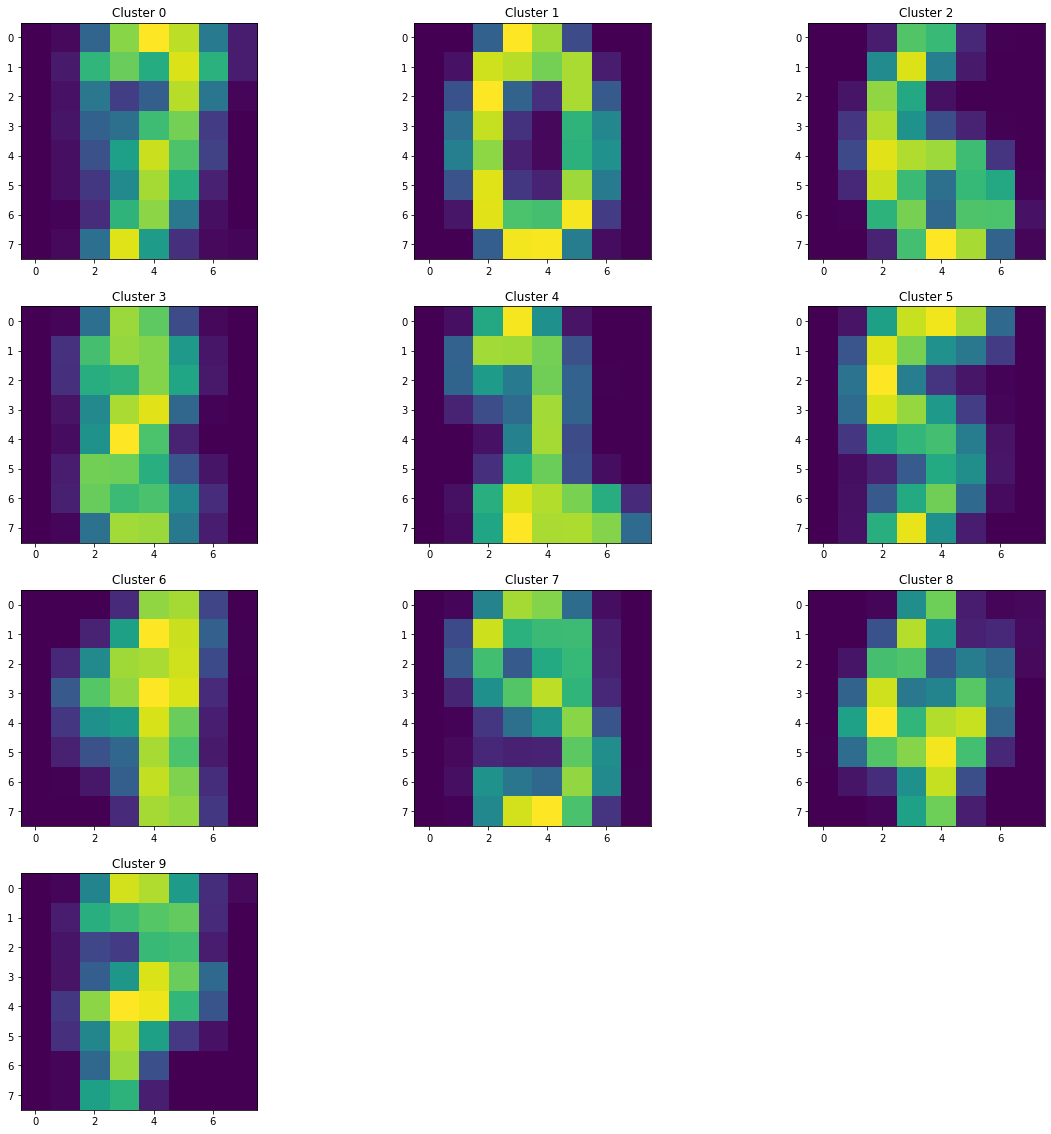

In [151]:
# Visualize clusters
centers = model2.cluster_centers_
centers = centers.reshape(centers.shape[0], int(centers.shape[1]**(1/2)), int(centers.shape[1]**(1/2)))

fig=plt.figure(figsize=(20, 20))
columns = 3
rows = 4
for i in range(0, centers.shape[0]):
    fig.add_subplot(rows, columns, i + 1, title=f'Cluster {i}');
    plt.imshow(centers[i])
plt.show();

In [136]:
# Predict cluster
clusters_pred = model2.fit(X_test).labels_

In [139]:
# Evaluation with report and confusion matrix
print("Classification report for k-Means %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, clusters_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, clusters_pred))

Classification report for k-Means KNeighborsClassifier(algorithm='brute'):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        48
           5       0.91      0.74      0.82        57
           6       0.03      0.02      0.02        60
           7       0.00      0.00      0.00        53
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00        57

    accuracy                           0.08       540
   macro avg       0.09      0.08      0.08       540
weighted avg       0.10      0.08      0.09       540


Confusion matrix:
[[ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0  1 19  8  1 22  0  0  1]
 [ 2  1  0 13 34  0  2  1  0  0]
 [13  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  

In [140]:
# Better evaluation
metrics.completeness_score(y_test, clusters_pred)
metrics.homogeneity_score(y_test, clusters_pred)
metrics.adjusted_mutual_info_score(y_test, clusters_pred)

0.716516964150211

0.6908312909572232

0.6926089101682492